<a href="https://colab.research.google.com/github/ManoloSampaio/QuarentenaDeDados/blob/master/QuarentenaDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulos usados:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Aula 1:

## Códigos da aula para montar o dataframe:

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [0]:
filmes.columns = ["filmeId", "titulo", "generos"]
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [4]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Desafio 1:
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
avaliacoes_media = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_nota = filmes.join(avaliacoes_media, on="filmeId")

In [7]:
filmes_sem_avaliacao=filmes_com_nota.loc[pd.isnull(filmes_com_nota['nota'])]
filmes_sem_avaliacao

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2:
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
filmes_com_nota = filmes_com_nota.rename(columns={'nota':'nota_media'})

In [9]:
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3:
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [10]:
ava=avaliacoes.groupby('filmeId').size()
ava.rename('nAva',inplace=True)
filmes_com_nota = filmes_com_nota.join(ava,on="filmeId")
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media,nAva
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4:
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [11]:
filmes_com_nota['nota_media']=filmes_com_nota['nota_media'].round(decimals=2)
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media,nAva
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


##Desafio 5:
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [12]:
generos_filmes = []
for i in range(0,9742): 
  generos_string=filmes_com_nota['generos'][i].split('|')
  for x in generos_string:
    generos_filmes.append(x)
generos_filmes = pd.unique(generos_filmes)
generos_filmes 

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

### Curiosidade: Que filme teve o gênero não listado:

In [13]:
filmes_sem_genero=filmes_com_nota.loc[filmes_com_nota['generos']=='(no genres listed)']
filmes_sem_genero

,filmeId,titulo,generos,nota_media,nAva
8517,114335,La cravate (1957),(no genres listed),3.00,1.0
8684,122888,Ben-hur (2016),(no genres listed),0.50,1.0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.79,7.0
8782,129250,Superfast! (2015),(no genres listed),0.50,1.0
8836,132084,Let It Be Me (1995),(no genres listed),2.50,1.0
8902,134861,Trevor Noah: African American (2013),(no genres listed),2.50,1.0
9033,141131,Guardians (2016),(no genres listed),2.50,1.0
9053,141866,Green Room (2015),(no genres listed),3.33,3.0
9070,142456,The Brand New Testament (2015),(no genres listed),4.00,2.0
9091,143410,Hyena Road,(no genres listed),2.00,1.0


## Desafio 6:
Contar o número de aparições de cada genero.

In [14]:
generos_filmes = []
for i in range(0,9742): 
  # Transformando os vetores com | em vetores
  generos_string=filmes_com_nota['generos'][i].split('|')
  # Colocando os generos dentro de uma lista.
  for x in generos_string:
    generos_filmes.append(x)
generos_filmes = pd.DataFrame(generos_filmes)
generos_filmes
generos_filmes.rename(columns={0:'genero'},inplace=True)
n_gen=generos_filmes.groupby('genero').size()
n_gen

genero
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7:
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

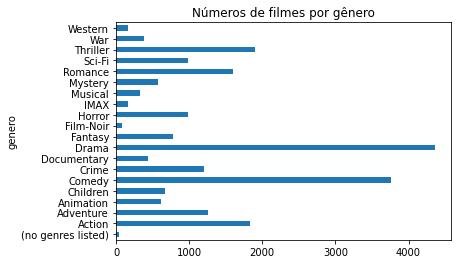

In [15]:
import matplotlib.pyplot as plt
n_gen = pd.DataFrame(n_gen)
n_gen.plot.barh(title="Números de filmes por gênero",legend=False)

# Aula 2:

## Desafio 1:
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

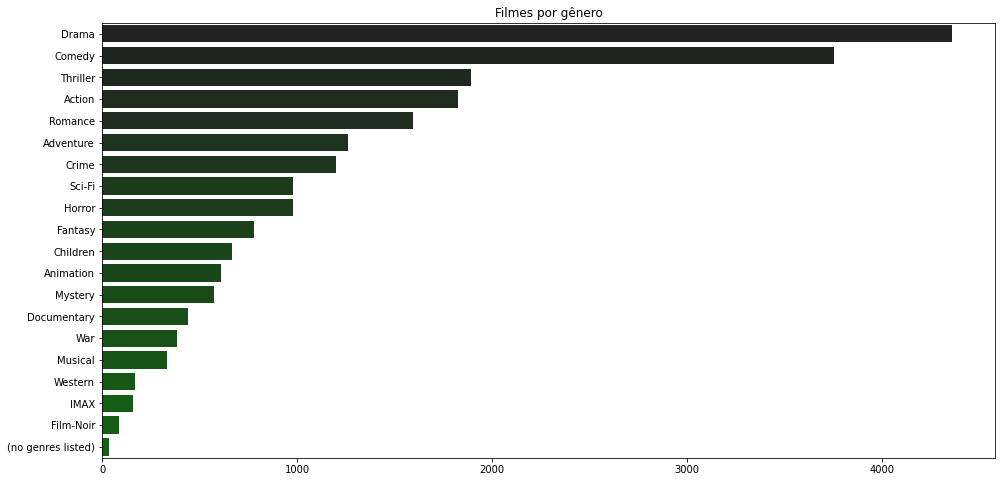

In [16]:
generos_filmes2=(filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False))
plt.figure(figsize=(16,8))
sns.barplot(y= generos_filmes2.index,x=generos_filmes2,palette=sns.dark_palette("green", n_colors=len(generos_filmes2) + 4))
plt.title("Filmes por gênero",fontsize=12)
plt.show()

## Desafio 2:
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  movie =filmes_com_nota.loc[filmes_com_nota['filmeId']==n]
  plt.title(movie['titulo'].values)
  return notas_do_filme.describe()

## Vamos definir o intervalo de análise

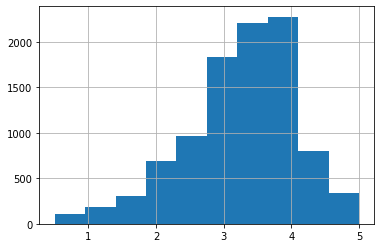

In [18]:
filmes_com_nota['nota_media'].hist()
plt.show()

Verificamos que em torno de 4 temos uma boa concentração de filmes

In [19]:
filmes_com_10ava=filmes_com_nota.loc[filmes_com_nota['nAva']>100]
filmes_com_nota_intervalo = filmes_com_10ava.loc[filmes_com_10ava['nota_media'].between(3.5,3.9)]
filmes_com_nota_intervalo=filmes_com_nota_intervalo.sort_values(by=['nota_media'],ascending=False)
filmes_com_nota_intervalo.head()

,filmeId,titulo,generos,nota_media,nAva
939,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,3.90,131.0
2078,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,3.89,179.0
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,3.89,109.0
4935,7438,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller,3.87,110.0
3568,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,3.87,132.0


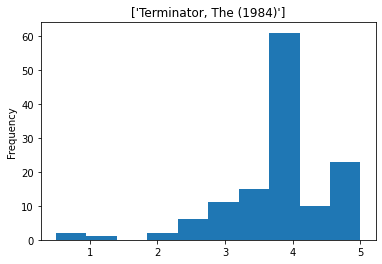

,nota
count,131.000000
mean,3.896947
std,0.849700
min,0.500000
25%,3.500000
50%,4.000000
75%,4.250000
max,5.000000


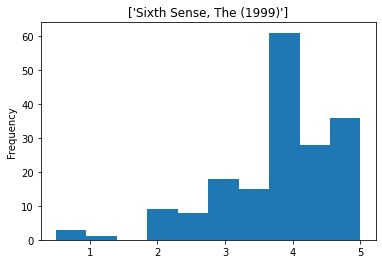

,nota
count,179.000000
mean,3.893855
std,0.955420
min,0.500000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


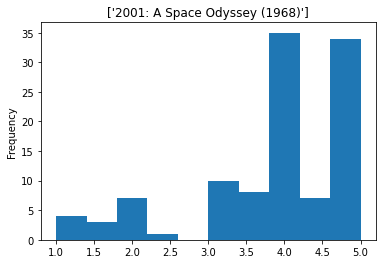

,nota
count,109.000000
mean,3.894495
std,1.103600
min,1.000000
25%,3.500000
50%,4.000000
75%,5.000000
max,5.000000


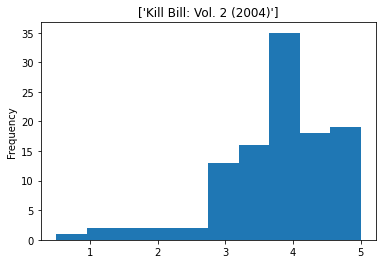

,nota
count,110.000000
mean,3.868182
std,0.927850
min,0.500000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


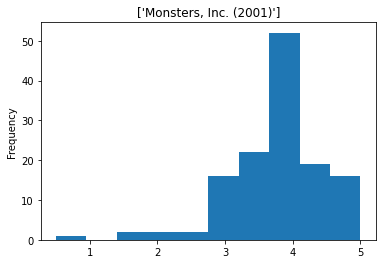

,nota
count,132.000000
mean,3.871212
std,0.768217
min,0.500000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


In [20]:
Idfilmes = filmes_com_nota_intervalo.head()['filmeId'].values
for n  in Idfilmes:
  resumo=plot_filme(n)
  resumo=pd.DataFrame(resumo)
  plt.show()
  display(resumo)

### Observação sobre os dados:
O Exterminador do Futuro tem muitas avaliações, em torno de 4 e poucas quando este o valor da avaliação é próxima de 5 mesmo tendo a mesma média que o de Sexto Sentido, que tem um número considerável de avaliações entre 4 e 5. Que fatores poderia influenciar isso? Observe o gênero de cada filme é diferente, será que isso pode ter impacto na avaliação? Monstros tem um comportamento parecido com Exterminador do Futuro, há alguma ligação entre eles(que faça sentido)?

## Desafio 3:
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
def plot_filme2(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  movie =filmes_com_nota.loc[filmes_com_nota['filmeId']==n]
  plt.title(movie['titulo'].values)
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  movie =filmes_com_nota.loc[filmes_com_nota['filmeId']==n]
  plt.title(movie['titulo'].values)
  plt.show()
  return notas_do_filme.describe()

In [22]:
filmes_com_mais_votos = filmes_com_nota.sort_values(by=['nAva'],ascending=False)
TOP_mais_votos=filmes_com_mais_votos.head(10)
TOP_mais_votos

,filmeId,titulo,generos,nota_media,nAva
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


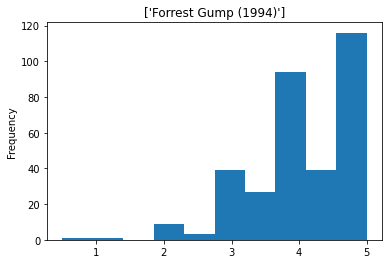

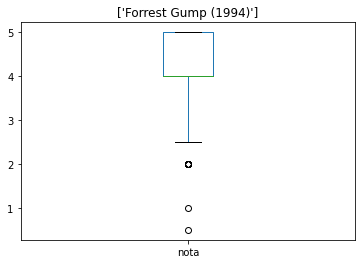

,nota
count,329.000000
mean,4.164134
std,0.831244
min,0.500000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


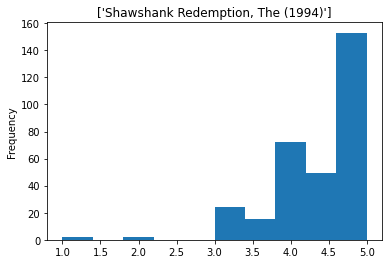

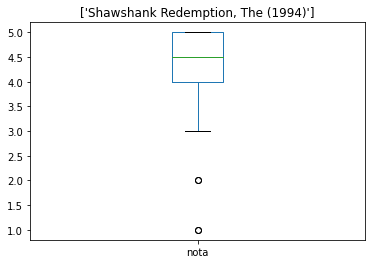

,nota
count,317.000000
mean,4.429022
std,0.713019
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


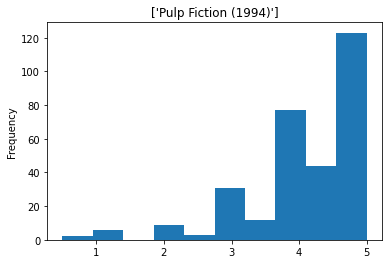

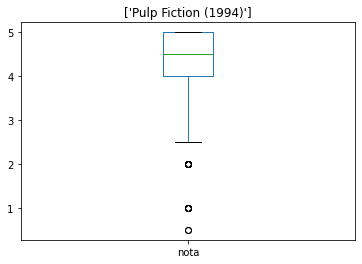

,nota
count,307.000000
mean,4.197068
std,0.951997
min,0.500000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


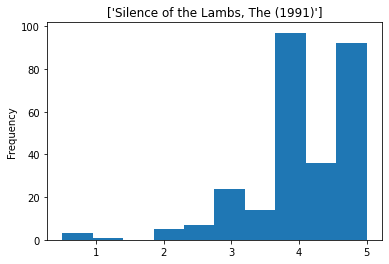

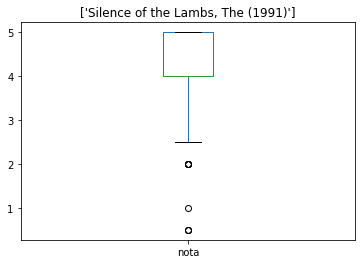

,nota
count,279.000000
mean,4.161290
std,0.853983
min,0.500000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


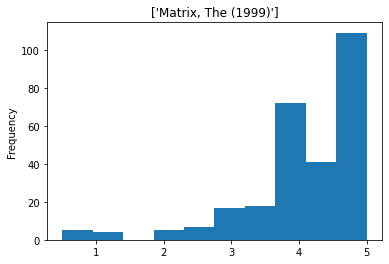

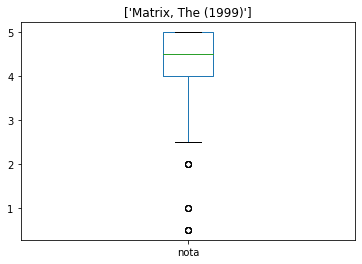

,nota
count,278.000000
mean,4.192446
std,0.975243
min,0.500000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


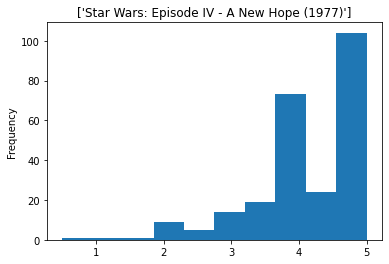

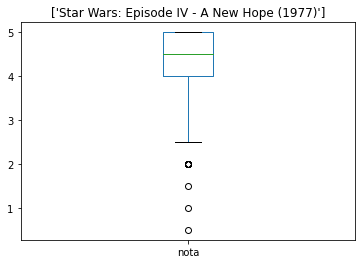

,nota
count,251.000000
mean,4.231076
std,0.872004
min,0.500000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


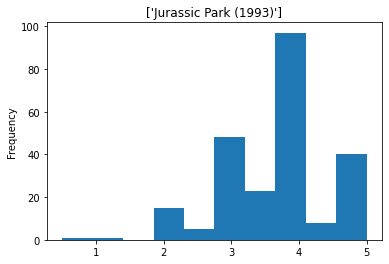

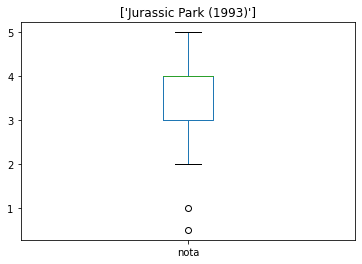

,nota
count,238.000000
mean,3.750000
std,0.855301
min,0.500000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


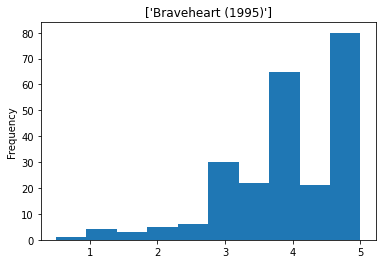

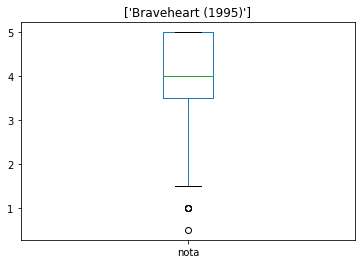

,nota
count,237.000000
mean,4.031646
std,0.967726
min,0.500000
25%,3.500000
50%,4.000000
75%,5.000000
max,5.000000


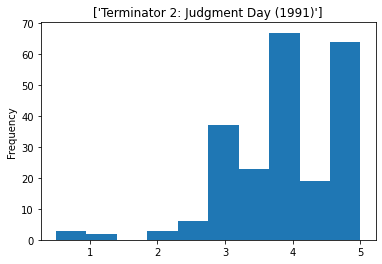

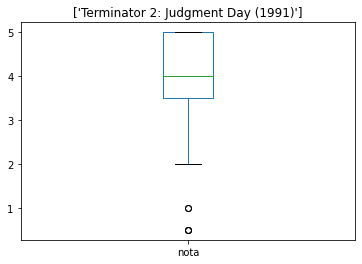

,nota
count,224.000000
mean,3.970982
std,0.926833
min,0.500000
25%,3.500000
50%,4.000000
75%,5.000000
max,5.000000


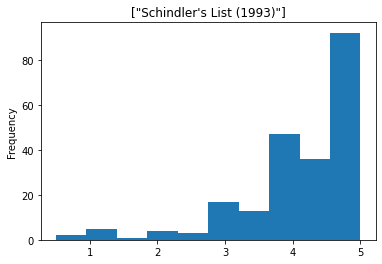

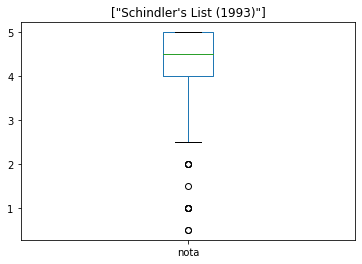

,nota
count,220.000000
mean,4.225000
std,0.975996
min,0.500000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [23]:
filme_Id_Top_10 = TOP_mais_votos['filmeId'].values
for x in filme_Id_Top_10:
  df = pd.DataFrame(plot_filme2(x))
  display(df)
  plt.show()

## Observação sobre os dados:
Jurassic
 Park 
 é um filme que a maioria não gostou tanto, pois 75% dos votos estão abaixo de 4, na média abaixo de 3.75
. Talvez isso tenha relação com a combinação dos gêneros do filme, por exemplo, filmes com drama,que estão nesse ranking, apresentam valores de avaliação acima de quatro em 75% das avaliações. O impacto da escolha do gênero pode ser visto também, quando comparamos Matrix, Star Wars e o Jurassic
 Park
. Star Wars tem 3 gêneros em comum com Jurassic
 Park
, menos terror ,
 já Matrix
 apresenta 3 gêneros em comum com Jurassic
 Park
, menos aventura. Resumindo, seria interessante verificar esse impacto dos gêneros para outros filmes, isso poderia ajudar a montar um filme bem avaliado(pelo menos em um mundo que se baseia apenas nesse dataset
).

## Desafio 4:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


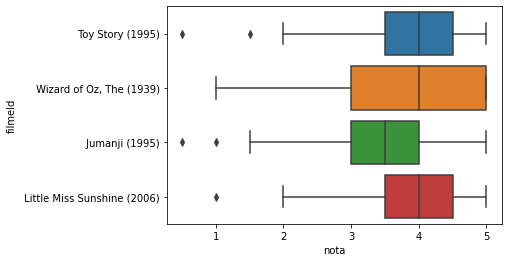

In [24]:
data1 = avaliacoes.query("filmeId in [1,2,919,46578]")
titulo1= filmes.loc[filmes['filmeId']==1]['titulo'].to_string(index=False)
titulo2= filmes.loc[filmes['filmeId']==2]['titulo'].to_string(index=False)
titulo3= filmes.loc[filmes['filmeId']==919]['titulo'].to_string(index=False)
titulo4= filmes.loc[filmes['filmeId']==46578]['titulo'].to_string(index=False)
data1['filmeId']=data1['filmeId'].map({1:titulo1,2:titulo2,919:titulo3,46578:titulo4})
sns.boxplot(data = data1, x ="nota", y="filmeId")

## Desafio 5
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

## Filmes com as menores notas: próximas de 0.5

In [25]:
worst_movies=filmes_com_nota.sort_values(by=['nota_media']).loc[filmes_com_nota['nAva']>3].head(10)
worst_movies

,filmeId,titulo,generos,nota_media,nAva
2825,3774,House Party 2 (1991),Comedy|Drama|Romance,0.75,4.0
5180,8387,Police Academy: Mission to Moscow (1994),Comedy|Crime,0.80,5.0
6286,47810,"Wicker Man, The (2006)",Horror|Mystery|Thriller,1.00,4.0
1015,1326,Amityville II: The Possession (1982),Horror,1.12,4.0
6398,50798,Epic Movie (2007),Adventure|Comedy,1.12,4.0
4613,6872,"House of the Dead, The (2003)",Action|Horror,1.12,4.0
2964,3973,Book of Shadows: Blair Witch 2 (2000),Crime|Horror|Mystery|Thriller,1.12,4.0
3863,5428,Cheech & Chong's The Corsican Brothers (1984),Comedy,1.12,4.0
3804,5323,Jason X (2002),Horror|Sci-Fi|Thriller,1.19,8.0
3071,4124,Jaws: The Revenge (1987),Horror|Thriller,1.25,4.0


In [26]:
worst_movies_id = worst_movies['filmeId'].values
for n in worst_movies_id:
  notas_do_filme=avaliacoes.query(f"filmeId=={n}")["nota"]
  titulo_do_filme= filmes.loc[filmes['filmeId']==n]['titulo'].to_string(index=False)
  print(titulo_do_filme)
  moda = notas_do_filme.mode()
  mean = notas_do_filme.mean()
  median = notas_do_filme.median()
  print("moda:",moda)
  print("media:",mean)
  print("mediana:",median)

 House Party 2 (1991)
moda: 0    0.5
1    1.0
dtype: float64
media: 0.75
mediana: 0.75
 Police Academy: Mission to Moscow (1994)
moda: 0    0.5
dtype: float64
media: 0.8
mediana: 0.5
 Wicker Man, The (2006)
moda: 0    1.0
dtype: float64
media: 1.0
mediana: 1.0
 Amityville II: The Possession (1982)
moda: 0    0.5
dtype: float64
media: 1.125
mediana: 1.0
 Epic Movie (2007)
moda: 0    1.5
dtype: float64
media: 1.125
mediana: 1.25
 House of the Dead, The (2003)
moda: 0    1.0
dtype: float64
media: 1.125
mediana: 1.0
 Book of Shadows: Blair Witch 2 (2000)
moda: 0    0.5
dtype: float64
media: 1.125
mediana: 0.75
 Cheech & Chong's The Corsican Brothers (1984)
moda: 0    1.0
dtype: float64
media: 1.125
mediana: 1.0
 Jason X (2002)
moda: 0    0.5
1    1.0
dtype: float64
media: 1.1875
mediana: 1.0
 Jaws: The Revenge (1987)
moda: 0    1.0
dtype: float64
media: 1.25
mediana: 1.0


## Observação sobre os dados:
Os filmes que apresentam 0.5 como moda são os :

1. Book of Shadows: Blair Witch 2 (2000).
2. Amityville II: The Possession (1982).
3. Police Academy: Mission to Moscow (1994).
4. Jason X 

São filmes, com baixa avaliação, a mediana em próxima de 1.Além disso, os gênero da maioria desses filmes, que é Horror. 


## Em torno de 3:


In [27]:
not_so_good_movies=filmes_com_nota.sort_values(by=['nota_media']).loc[filmes_com_nota['nAva']>10].loc[filmes_com_nota['nota_media']>=3].head(10)
not_so_good_movies

,filmeId,titulo,generos,nota_media,nAva
7503,83349,"Green Hornet, The (2011)",Action|Comedy|Crime|Fantasy|Thriller|IMAX,3.0,11.0
1062,1379,Young Guns II (1990),Action|Western,3.0,11.0
14,15,Cutthroat Island (1995),Action|Adventure|Romance,3.0,13.0
1035,1347,"Nightmare on Elm Street, A (1984)",Horror|Thriller,3.0,27.0
3770,5266,Panic Room (2002),Thriller,3.0,37.0
3723,5151,40 Days and 40 Nights (2002),Comedy|Romance,3.0,18.0
504,586,Home Alone (1990),Children|Comedy,3.0,116.0
6470,52722,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX,3.0,44.0
387,445,Fatal Instinct (1993),Comedy,3.0,12.0
465,532,Serial Mom (1994),Comedy|Crime|Horror,3.0,16.0


In [28]:
not_so_good_id = not_so_good_movies['filmeId'].values
for n in not_so_good_id:
  notas_do_filme=avaliacoes.query(f"filmeId=={n}")["nota"]
  titulo_do_filme= filmes.loc[filmes['filmeId']==n]['titulo'].to_string(index=False)
  print(titulo_do_filme)
  moda = notas_do_filme.mode()
  mean = notas_do_filme.mean()
  median = notas_do_filme.median()
  print("moda:",moda)
  print("media:",mean)
  print("mediana:",median)

 Green Hornet, The (2011)
moda: 0    3.0
dtype: float64
media: 3.0
mediana: 3.0
 Young Guns II (1990)
moda: 0    2.0
dtype: float64
media: 3.0
mediana: 3.0
 Cutthroat Island (1995)
moda: 0    4.0
dtype: float64
media: 3.0
mediana: 3.0
 Nightmare on Elm Street, A (1984)
moda: 0    3.0
dtype: float64
media: 3.0
mediana: 3.0
 Panic Room (2002)
moda: 0    3.5
dtype: float64
media: 3.0
mediana: 3.0
 40 Days and 40 Nights (2002)
moda: 0    2.5
dtype: float64
media: 3.0
mediana: 3.0
 Home Alone (1990)
moda: 0    3.0
dtype: float64
media: 2.9956896551724137
mediana: 3.0
 Spider-Man 3 (2007)
moda: 0    3.5
dtype: float64
media: 3.0
mediana: 3.0
 Fatal Instinct (1993)
moda: 0    3.0
dtype: float64
media: 3.0
mediana: 3.0
 Serial Mom (1994)
moda: 0    3.0
dtype: float64
media: 3.0
mediana: 3.0


### Em torno de 5:

In [29]:
good_movies=filmes_com_nota.sort_values(by=['nota_media']).loc[filmes_com_nota['nAva']>=1].loc[filmes_com_nota['nota_media']==5].head(10)
good_movies

,filmeId,titulo,generos,nota_media,nAva
4044,5745,"Four Seasons, The (1981)",Comedy|Drama,5.0,1.0
7239,73822,Meantime (1984),Comedy|Drama,5.0,1.0
5448,26073,"Human Condition III, The (Ningen no joken III)...",Drama|War,5.0,1.0
7249,74226,"Dream of Light (a.k.a. Quince Tree Sun, The) (...",Documentary|Drama,5.0,1.0
666,876,Supercop 2 (Project S) (Chao ji ji hua) (1993),Action|Comedy|Crime|Thriller,5.0,1.0
9688,184245,De platte jungle (1978),Documentary,5.0,1.0
4590,6818,Come and See (Idi i smotri) (1985),Drama|War,5.0,2.0
4595,6835,Alien Contamination (1980),Action|Horror|Sci-Fi,5.0,1.0
9568,173963,Empties (2007),Comedy,5.0,1.0
5138,8238,Little Murders (1971),Comedy|Crime,5.0,1.0


In [30]:
good_id = good_movies['filmeId'].values
for n in good_id:
  notas_do_filme=avaliacoes.query(f"filmeId=={n}")["nota"]
  titulo_do_filme= filmes.loc[filmes['filmeId']==n]['titulo'].to_string(index=False)
  print(titulo_do_filme)
  moda = notas_do_filme.mode()
  mean = notas_do_filme.mean()
  median = notas_do_filme.median()
  print("moda:",moda)
  print("media:",mean)
  print("mediana:",median)

 Four Seasons, The (1981)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Meantime (1984)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Human Condition III, The (Ningen no joken III)...
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Dream of Light (a.k.a. Quince Tree Sun, The) (...
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Supercop 2 (Project S) (Chao ji ji hua) (1993)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 De platte jungle (1978)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Come and See (Idi i smotri) (1985)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Alien Contamination (1980)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Empties (2007)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0
 Little Murders (1971)
moda: 0    5.0
dtype: float64
media: 5.0
mediana: 5.0


## Desafio 6:
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

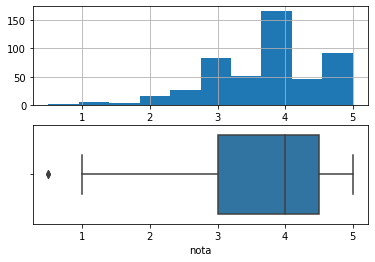

In [31]:
notas_filme_1 = avaliacoes.query(f"filmeId==1")
plt.subplot(211)
data1['nota'].hist()
plt.subplot(212)
#data1['nota'].plot.box()
sns.boxplot(data = data1, x ="nota")

## Desafio 7:
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

### Passo 1: Verificando como encontrar os anos no titulo do filme

In [32]:
nomes_filmes = filmes_com_nota["titulo"]
nomes_filmes

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: titulo, Length: 9742, dtype: object

### Passo 2: Realizando a retirada dos valores dos anos

In [33]:
nomes_filmes = filmes_com_nota["titulo"]
nomes_filmes = nomes_filmes.str.strip() #Retirando spaces 
anos_filmes = nomes_filmes.str.slice(start=-5) # Removendo (
anos_filmes = anos_filmes.str.slice(stop=4) # Removendo )
anos_filmes.rename('ano',inplace=True) # Renomeando a time series
filmes_com_nota_com_anos = filmes_com_nota.join(anos_filmes) #
pd.unique(filmes_com_nota_com_anos['ano'])

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', 'lon ', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', 'r On', ' Roa', 'atso', 'imal', 'erso',
      

## Passo 4: Removendo os strings restantes na marra.

In [0]:
NotaTotal = filmes_com_nota_com_anos['nAva']*filmes_com_nota_com_anos['nota_media']
NotaTotal.rename('notaTotal',inplace=True)
final_filmes_total =filmes_com_nota_com_anos.join(NotaTotal)
value_final = final_filmes_total.groupby('ano').sum()
not_good =['r On', ' Roa', 'atso', 'imal', 'erso','ligh', 'he O', 'osmo', ' Bab', 'ron ', 'irro','lon ']
for x in not_good:
  value_final =value_final.drop(x) 
media = value_final['notaTotal']/value_final['nAva']
media.rename("mediaAno",inplace=True)
value_final_2 = value_final.join(media)

### FINALMENTE O PLOT:

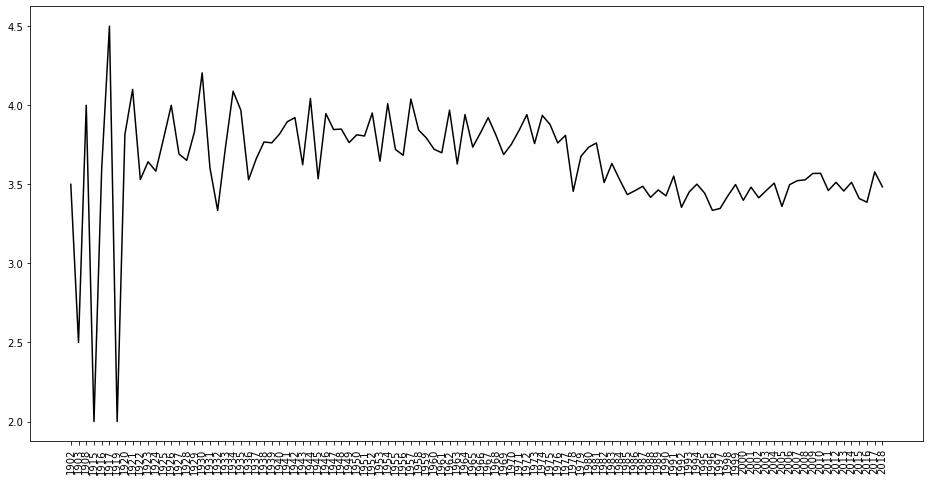

In [35]:
plt.figure(figsize=(16,8))
plt.plot(value_final_2.index,value_final_2['mediaAno'],'k')
plt.xticks(rotation=90)
plt.show()